In [94]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import torch
from torch.autograd import Variable


In [95]:
x_values = [i for i in range(21)]
x_train=np.array(x_values,dtype=np.float32)
x_train = x_train.reshape(-1,1)
y_values=[2*i+1+(np.random.rand(1)-0.5)*5 for i in x_values]
y_train=np.array(y_values,dtype=np.float32)
y_train=y_train.reshape(-1,1)

In [96]:
class linearRegression(torch.nn.Module):
    def __init__(self,inputSize,outputSize):
        super(linearRegression,self).__init__()
        self.linear=torch.nn.Linear(inputSize,outputSize)
    def forward(self,x):
        out=self.linear(x)
        return out

In [97]:
inputDim=1
outputDim=1
learningRate=0.0001
epochs=1000
model =linearRegression(inputDim,outputDim)
model.cuda()

linearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [98]:
criterion=torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learningRate)

In [99]:
for epoch in range(epochs):
    inputs = Variable(torch.from_numpy(x_train).cuda())
    labels=Variable(torch.from_numpy(y_train).cuda())
    optimizer.zero_grad()
    outputs=model(inputs)
    loss=criterion(outputs,labels)
    print(loss)
    loss.backward()
    optimizer.step()
    print("epoch {}, loss {}".format(epoch,loss.item()))

tensor(197.7075, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 0, loss 197.70750427246094
tensor(187.1721, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 1, loss 187.17205810546875
tensor(177.2077, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 2, loss 177.2076873779297
tensor(167.7834, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 3, loss 167.78338623046875
tensor(158.8700, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 4, loss 158.86996459960938
tensor(150.4396, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 5, loss 150.43963623046875
tensor(142.4663, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 6, loss 142.46629333496094
tensor(134.9252, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 7, loss 134.92515563964844
tensor(127.7928, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 8, loss 127.79276275634766
tensor(121.0470, device='cuda:0', grad_fn=<MseLossBackward0>)
epoch 9, loss 121.04695892333984
tensor(114.6668, device='cuda:0', grad_fn=<MseLossB

In [100]:
with torch.no_grad():
    predicted=model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    print(predicted)


[[-0.5913738]
 [ 1.532154 ]
 [ 3.6556816]
 [ 5.7792096]
 [ 7.902737 ]
 [10.026265 ]
 [12.149793 ]
 [14.27332  ]
 [16.396849 ]
 [18.520376 ]
 [20.643904 ]
 [22.767431 ]
 [24.890959 ]
 [27.014486 ]
 [29.138016 ]
 [31.261543 ]
 [33.38507  ]
 [35.5086   ]
 [37.632126 ]
 [39.755653 ]
 [41.87918  ]]


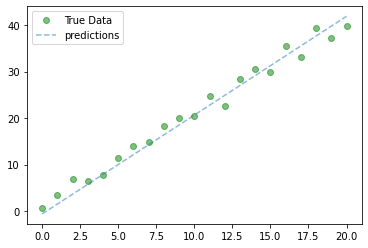

In [101]:
plt.clf()
plt.plot(x_train,y_train,"go",label="True Data",alpha=0.5)
plt.plot(x_train,predicted,"--",label="predictions",alpha=0.5)
plt.legend(loc="best")
plt.show()
